In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.9 MB/s eta 0:00:00


In [8]:
!apt-get -qq install -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


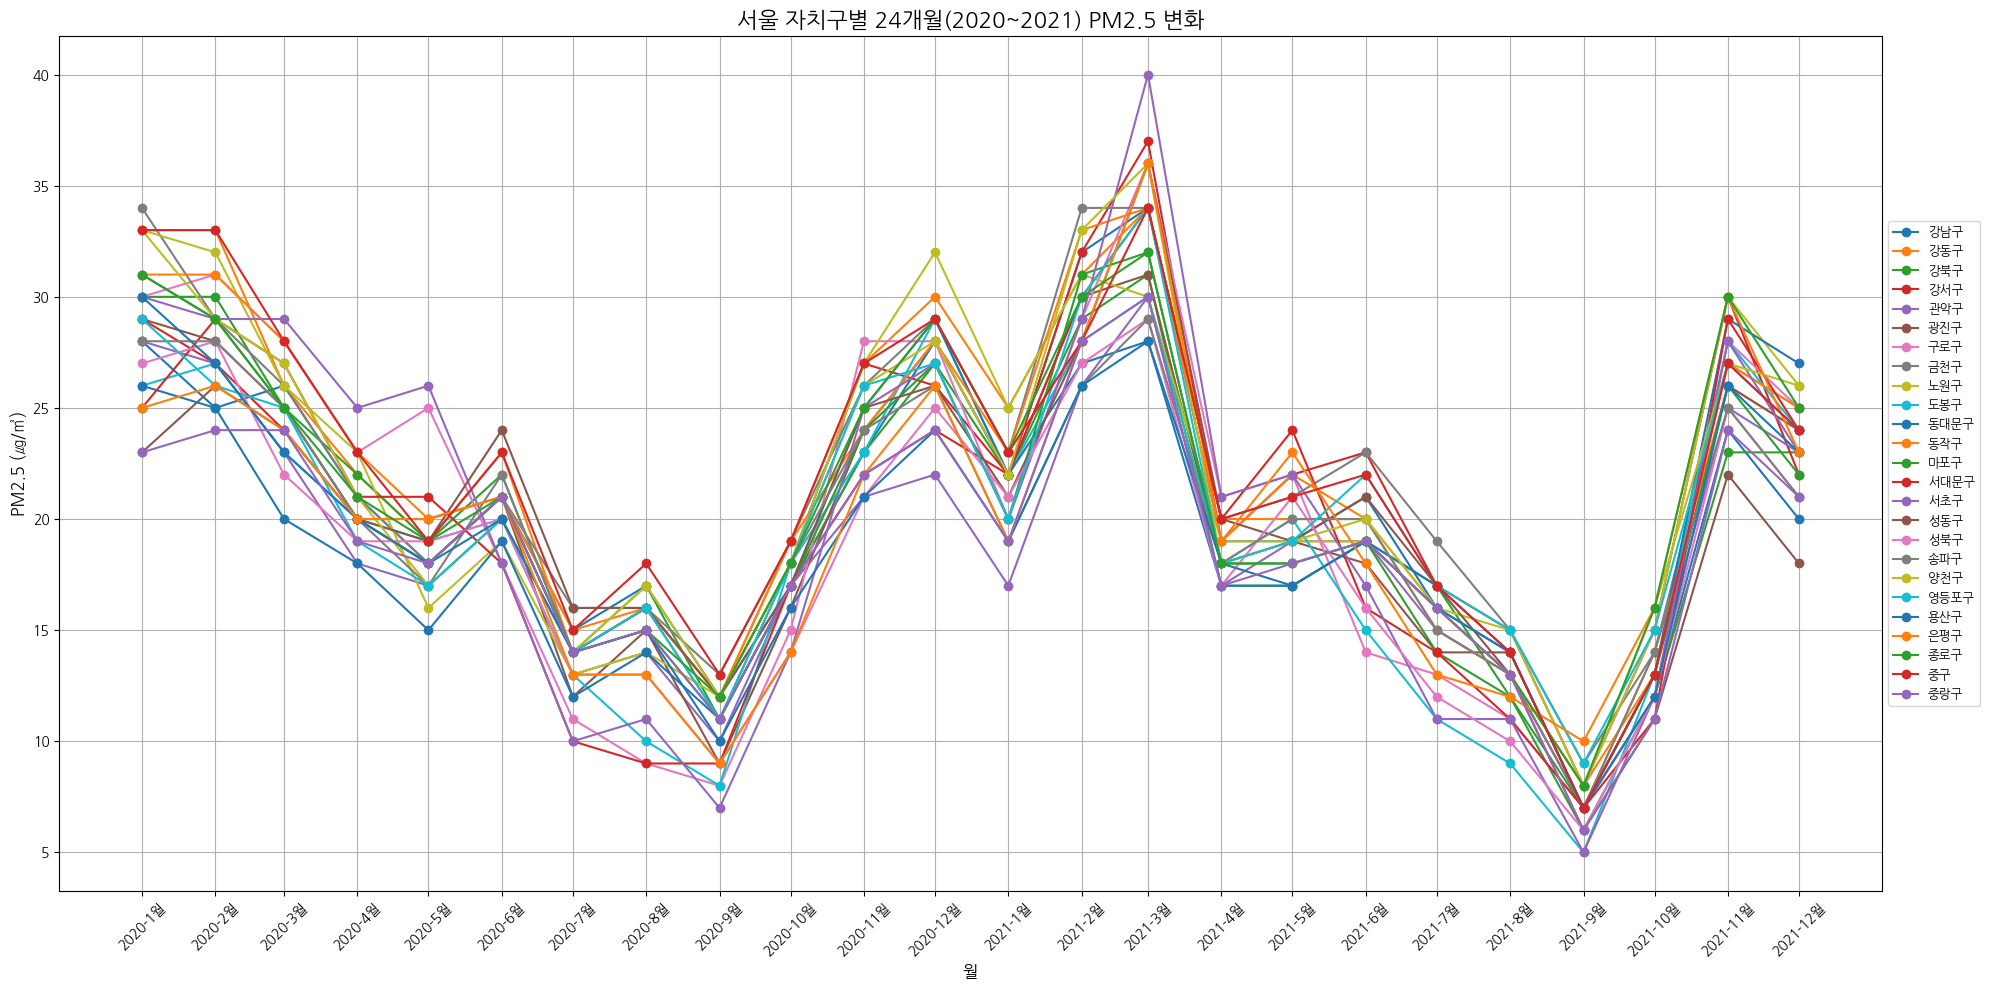

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = '/content/drive/MyDrive/시계열 데이터 분석/팀플/시계열데이터/서울_자치구_PM25_2020_2021_24개월_변경.csv'
df = pd.read_csv(file_path)

# 날짜 열을 datetime 형식으로 변환
df['Year_Month'] = pd.to_datetime(df['Year_Month'])

# 피벗: 자치구를 인덱스로, 날짜를 컬럼으로
pivot_df = df.pivot(index='자치구', columns='Year_Month', values='PM2.5')

# 그래프 그리기
plt.figure(figsize=(20, 10))

for gu in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[gu], marker='o', label=gu)

# 그래프 제목과 축 설정
plt.title('서울 자치구별 24개월(2020~2021) PM2.5 변화', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('PM2.5 (㎍/㎥)', fontsize=12)

# x축 레이블을 "YYYY-월" 형식으로 설정
plt.xticks(pivot_df.columns, [f'{d.year}-{d.month}월' for d in pivot_df.columns], rotation=45)

plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=9)
plt.tight_layout()
plt.show()
